In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']  # Example font



In [2]:
img = cv2.imread('./Dataset/lionel_messi/avatar-leomessi.png')
img.shape

(500, 500, 3)

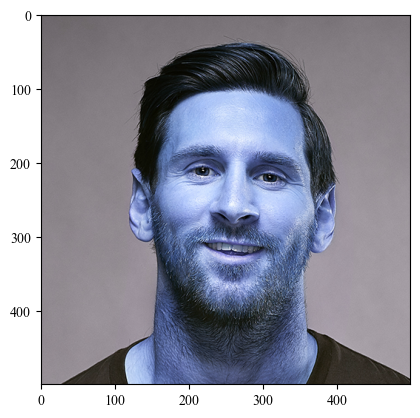

In [3]:
plt.imshow(img)
plt.show()

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(500, 500)

In [5]:
gray

array([[104, 101, 101, ..., 118, 118, 117],
       [103, 103, 104, ..., 119, 121, 119],
       [105, 105, 103, ..., 120, 119, 121],
       ...,
       [142, 146, 145, ...,  39,  71,  75],
       [150, 146, 146, ...,  41,  40,  59],
       [147, 149, 149, ...,  42,  40,  39]], dtype=uint8)

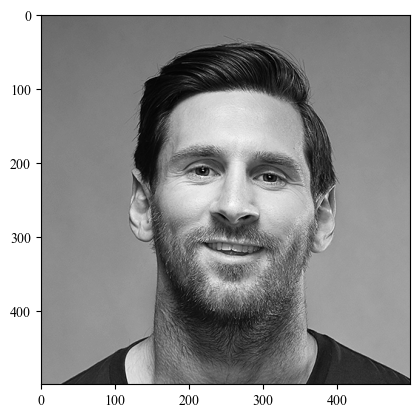

In [6]:
plt.imshow(gray, cmap = 'gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[120, 101, 278, 278]])

In [8]:
(x, y, w, h) = faces[0]
x, y, w, h

(120, 101, 278, 278)

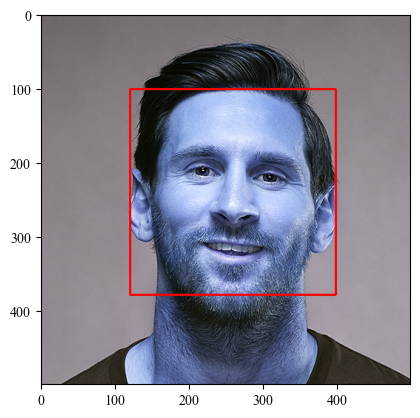

In [9]:
face_img = cv2.rectangle(img,(x,y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)                        
                             

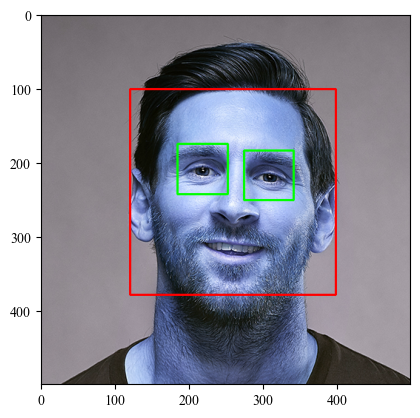

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

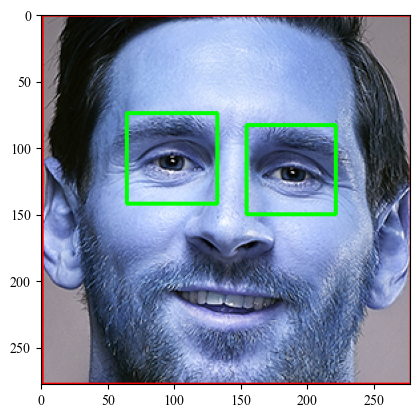

In [11]:
plt.imshow(roi_color, cmap = 'gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                            return roi_color

        
    

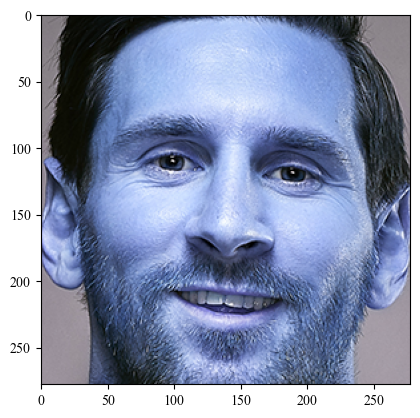

In [13]:
cropped_image = get_cropped_image_if_2_eyes('./Dataset/lionel_messi/avatar-leomessi.png')
plt.imshow(cropped_image)

In [14]:
path_to_data = './Dataset/'
path_to_cr_data = './Dataset/Cropped/'

In [15]:
import os
img_dirs =[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [16]:
img_dirs

['./Dataset/Cropped',
 './Dataset/lionel_messi',
 './Dataset/maria_sharapova',
 './Dataset/roger_federer',
 './Dataset/serena_williams',
 './Dataset/virat_kohli']

In [17]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [52]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1
                
                
                
        

Generating cropped images in folder:  ./Dataset/Cropped/lionel_messi
Generating cropped images in folder:  ./Dataset/Cropped/maria_sharapova
Generating cropped images in folder:  ./Dataset/Cropped/roger_federer
Generating cropped images in folder:  ./Dataset/Cropped/serena_williams
Generating cropped images in folder:  ./Dataset/Cropped/virat_kohli


In [53]:
import numpy as np
import pywt
import cv2

def w2d(img, mode = 'haar', level =1):
    imArray = img
    
    #To convert to gray scale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    
    #To convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    
    #To compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    #Process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *=0;
    
    #Reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *=255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H


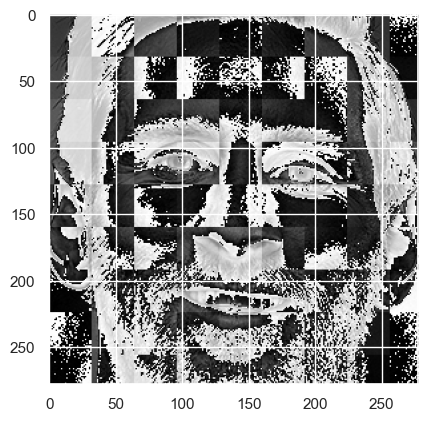

In [54]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap = 'gray')

In [56]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./Dataset/Cropped/lionel_messi\\lionel_messi1.png',
  './Dataset/Cropped/lionel_messi\\lionel_messi10.png',
  './Dataset/Cropped/lionel_messi\\lionel_messi11.png',
  './Dataset/Cropped/lionel_messi\\lionel_messi13.png',
  './Dataset/Cropped/lionel_messi\\lionel_messi14.png',
  './Dataset/Cropped/lionel_messi\\lionel_messi15.png',
  './Dataset/Cropped/lionel_messi\\lionel_messi16.png',
  './Dataset/Cropped/lionel_messi\\lionel_messi17.png',
  './Dataset/Cropped/lionel_messi\\lionel_messi18.png',
  './Dataset/Cropped/lionel_messi\\lionel_messi19.png',
  './Dataset/Cropped/lionel_messi\\lionel_messi2.png',
  './Dataset/Cropped/lionel_messi\\lionel_messi20.png',
  './Dataset/Cropped/lionel_messi\\lionel_messi22.png',
  './Dataset/Cropped/lionel_messi\\lionel_messi23.png',
  './Dataset/Cropped/lionel_messi\\lionel_messi24.png',
  './Dataset/Cropped/lionel_messi\\lionel_messi25.png',
  './Dataset/Cropped/lionel_messi\\lionel_messi26.png',
  './Dataset/Cropped/lionel_messi\

In [57]:
#To assign each celebrity a number

class_dict = {}
count = 0

for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [61]:

x = []
y = []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])  
            
            
            
            

In [62]:
len(x[0])

4096

In [63]:
x = np.array(x).reshape(len(x), 4096).astype(float)
x.shape

(169, 4096)

In [64]:
x[0]

array([100., 129., 140., ..., 237., 234., 232.])

In [65]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])

pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.8372093023255814

In [67]:
len(x_test)

43

In [68]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.90      0.90      0.90        10
           2       0.62      0.83      0.71         6
           3       1.00      0.88      0.93         8
           4       0.85      0.92      0.88        12

    accuracy                           0.84        43
   macro avg       0.83      0.82      0.82        43
weighted avg       0.85      0.84      0.84        43



In [69]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [70]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [73]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.802462,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.666154,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.858154,{'logisticregression__C': 1}


In [74]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [75]:
best_estimators['svm'].score(x_test, y_test)

0.9069767441860465

In [76]:
best_estimators['random_forest'].score(x_test, y_test)

0.6046511627906976

In [77]:
best_estimators['logistic_regression'].score(x_test, y_test)

0.9069767441860465

In [78]:
from sklearn.metrics import confusion_matrix

In [89]:
model = SVC(probability= True)

In [90]:
model.fit(x_train, y_train)

SVC(probability=True)

In [91]:
y_pred = model.predict(x_test)

In [92]:
cm = confusion_matrix(y_test, y_pred)

In [93]:
cm

array([[ 4,  0,  2,  0,  1],
       [ 0,  9,  0,  0,  1],
       [ 1,  1,  4,  0,  0],
       [ 0,  0,  1,  7,  0],
       [ 0,  0,  0,  0, 12]], dtype=int64)

In [94]:
import seaborn as sns
sns.set()

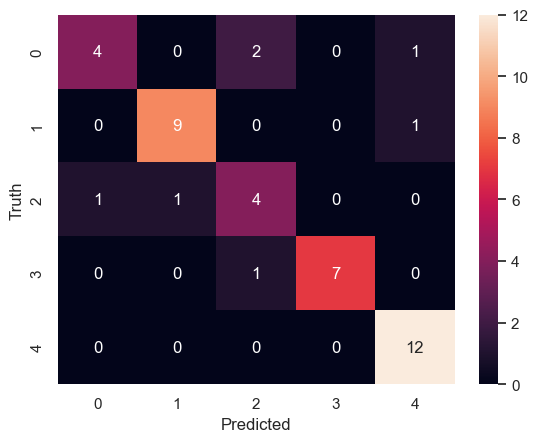

In [95]:

sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [96]:
#To save the model

import joblib

#To save the file as pickle file
joblib.dump(model, 'saved_model.pkl')


['saved_model.pkl']

In [88]:
#To save the dictionary

import json

with open('class_dictionary.json', 'w') as f:
    f.write(json.dumps(class_dict))